## Exercise 5 - Probabilistic models

First name: Brian
<br>
Last name: Schweigler
<br>
Matriculation number: 16-102-071


##### Q1: Considering the words “to”, “upon” and “would”, draw a graph representing the occurrences of those words in Hamilton and Madison’s articles
General imports and solving the question:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


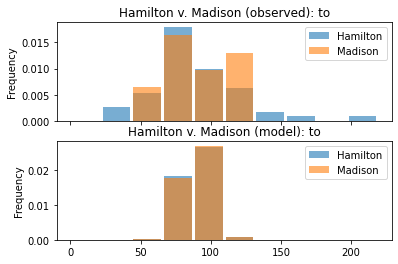

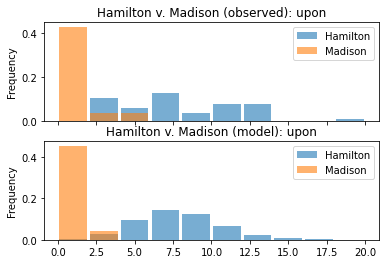

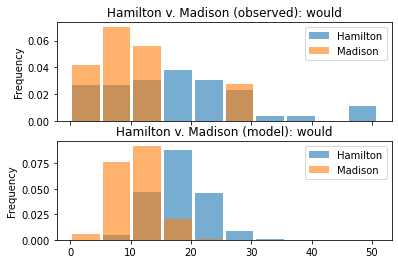

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import lxml.etree
import os
from scipy import stats

np.random.seed(6)  # for reproducibility
df = pd.read_csv('Data/federalist-papersNew2.csv', index_col=0)
hamilton = df[df['AUTHOR'] == 'Hamilton']
madison = df[df['AUTHOR'] == 'Madison']

combined = pd.concat([hamilton, madison])
test_indices = [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63]
test_set = df.loc[test_indices]

simulations = 100000


def binomial_samples(n, prob, size=None):
    return np.random.binomial(n, prob, size)


for token in ['to', 'upon', 'would']:
    values = combined.groupby('AUTHOR')[token].describe()[['max', 'mean', 'count']]
    fig, axes = plt.subplots(2, 1, sharex=True)
    combined.groupby('AUTHOR')[token].plot.hist(density=True, rwidth=0.9,
                                                alpha=0.6, legend=True, ax=axes[0], bins=10,
                                                range=(0, max(values['max'])))

    for author in ['Hamilton', 'Madison']:
        mean = values.loc[author]["mean"]
        count = values.loc[author]["count"]
        pd.Series(binomial_samples(1000, mean / 1000, size=simulations)).\
            plot.hist(
            label=author, density=True, rwidth=0.9, alpha=0.6, ax=axes[1],
            bins=10, range=(0, max(values["max"])), legend=True)

    axes[0].set_title('Hamilton v. Madison (observed): ' + token)
    axes[1].set_title('Hamilton v. Madison (model): ' + token)

    plt.show()


##### Q2: Model these three words as a Binomial distribution, to reflect either occurrences in Hamilton or Madison’s writing style (you only need to estimate the parameters p and n).

See the plots above.

##### Q3: If p = 0.001 and n = 5000, what is the probability (according to a Binomial) that we observe 5 occurrences of the underlying word-type?

Setup and solving the task

In [8]:
binomial_samples(5000, 0.001)

5

Isn't this simply 1'000?



##### Q4: Represent in a histogram the article lengths. Does it make sense to consider this distribution as a Gaussian one?

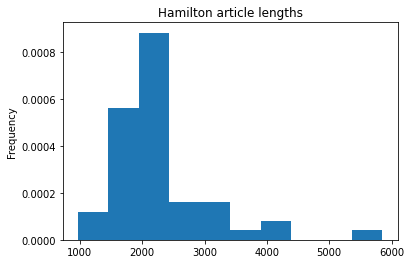

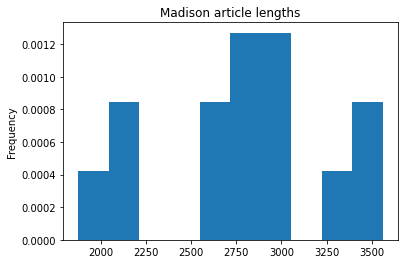

In [9]:
authors = combined['AUTHOR'].copy()
lengths = combined.drop('AUTHOR', axis=1).sum(axis=1)
pd.Series(lengths[authors == 'Hamilton']).plot.hist(density=True, )
plt.title('Hamilton article lengths')
plt.show()
pd.Series(lengths[authors == 'Madison']).plot.hist(density=True, )
plt.title('Madison article lengths')
plt.show()

Hamilton could resemble a Gaussian distribution, (centered around a length of 2250), but for Madison it does not really match.

##### Q5: Compute the probabilities of obtaining the two sequences with and without Laplace smoothing.



In [5]:
tokens = 5050
unigrams = { "tri" : 1000 ,"the" : 1350,"big":320, "increase" : 10 , "deal": 15,
"today": 25 , "bank" : 8, "stock": 25 , "will" : 56 , "is" : 132}
bigrams = {"tri today" : 3 ,"today the" : 4 , "the big" : 210 , "deal tri": 1 ,
"the stock" : 8, "stock is" : 2 , "tri the" :580 , "big deal" : 11}

sentence_1 = "today the big deal".split(" ")
sentence_2 = "the stock is decreasing".split(" ")

Mean of 'Tragédie' work-tokens:  14326.026666666667
p-Value for French tragedies containing 14'000 words: 0.24197018702608467


Here we have a lower p-value, the null-hypothesis is unlikelier than before, but normally we would only accept the alternative hypothesis at a significance level of 0.05 or lower.

##### Q6: Provide an example of one drawback of applying the direct estimation as suggested by Mary. Provide as well two drawbacks related to Laplace smoothing.

With Mary's approach we may assign the probability of 0 to something we do not know.

With Laplace smoothing, we estimate the probability of something we do not know.
Furthermore, we tend to overestimate the probability of words we do not see; which is especially a problem once the sample gets too large.

Here we have a p-value below 0.05, thus we accept the alternative hypothesis that the mean is unlikely to be 15'000 for french tragedies, based on this data.